<a href="https://colab.research.google.com/github/Cristvillanueva/Simulaci-n-II/blob/main/Aproximaci%C3%B3n%20al%20valor%20de%20pi%20con%20metodolog%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aproximación a la integral por medio de Monte Carlo Acierto y Error (Hit or Miss) con METODOLOGÍA

\begin{equation*}
\begin{aligned}
 I = \int_0^\infty x(1+x^2)^{-2} \quad dx
\end{aligned}
\end{equation*}

**Solución Analitica**
Es facil ver que la integral es una integral imporpia, por lo que:
\begin{equation*}
\begin{aligned}
I &= \lim_{b \to \infty} \int_{0}^{b} x(1+x^2)^{-2} \quad dx \\
&= \lim_{b \to \infty} \int_{0}^{b} \frac{x}{(1+x^2)^2} \quad dx \\
\end{aligned}
\end{equation*}
Sea $u=1+x^2$, derivando $\frac{du}{dx} = 2x$, entonces $du = 2x dx$. 
\begin{equation*}
\begin{aligned}
&= \lim_{b \to \infty} \frac{1}{2} \int_{0}^{b} \frac{2x}{(1+x^2)^2} \quad dx \\
&= \lim_{b \to \infty} \frac{1}{2} \int_{0}^{b} \frac{1}{u^2} \quad du \\
&= \lim_{b \to \infty} \frac{1}{2} \int_{0}^{b} u^{-2} \quad du \\
&= \lim_{b \to \infty} \frac{1}{2} \left(\frac{u^{-2+1}}{-2+1}\right) \bigg|_0^b \\
&= \lim_{b \to \infty} \frac{1}{2} \left(\frac{u^{-1}}{-1}\right) \bigg|_0^b \\
&= \lim_{b \to \infty} -\frac{1}{2} \left(\frac{1}{u}\right) \bigg|_0^b \\
&= \lim_{b \to \infty} -\frac{1}{2} \left(\frac{1}{1+x^2}\right) \bigg|_0^b \\
&= \lim_{b \to \infty} -\frac{1}{2} \left(\frac{1}{1+b^2} - \frac{1}{1+0^2}\right)  \\
&= \lim_{b \to \infty} \left(\frac{-1}{2(1+b^2)} + \frac{1}{2}\right)  \\
\therefore I &= \frac{1}{2} \blacksquare
\end{aligned}
\end{equation*}

Al realizar la simulación nos percatamos que la aproximación no era buena, optamos por realizar un cambio de variable para cambiarlo los limites de integración así como la función.
Sea $u = \frac{1}{1+x}$, una propuesta de cambio de variable, entonces:
\begin{equation*}
\begin{aligned}
x = 0 & \rightarrow u = 1 \\
x = \infty & \rightarrow u = 0
\end{aligned}
\end{equation*}
Por lo que podemos ver, es una buena propuesta aunque tenemos que modificar un poco para que los limistes de integración nos queden de 0 a 1. Entonces
\begin{equation*}
\begin{aligned}
x &= \frac{1}{u}-1 \rightarrow x = u^{-1} -1 \\
\frac{dx}{du} &= -u^{-2} \rightarrow dx = -u^{-2}du
\end{aligned}
\end{equation*}
Reescribiendo la integral y aplicando el cambio de variable, tenemos:
\begin{equation*}
\begin{aligned}
 I &= \int_1^0 \left(\frac{1}{u}-1\right)\left(1+\left( \frac{1}{u}-1 \right)^2\right)^{-2} \quad \left(-u^{-2}\right)du \\
  &= -\int_1^0 \left(\frac{1}{u^{3}}-\frac{1}{u^2}\right)\left(1+\left( \frac{1}{u}-1 \right)^2\right)^{-2} \quad du
\end{aligned}
\end{equation*}
Utilizando la propiedad de :
\begin{equation*}
\begin{aligned}
\int_a^b f(x) dx = - \int_b^a f(x)dx 
\end{aligned}
\end{equation*}
Tenemos:
\begin{equation*}
\begin{aligned}
 I = \int_0^\infty x(1+x^2)^{-2} \quad dx = \int_0^1 \left(\frac{1}{u^{3}}-\frac{1}{u^2}\right)\left(1+\left( \frac{1}{u}-1 \right)^2\right)^{-2} \quad du
\end{aligned}
\end{equation*}

**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

In [7]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [8]:
def funcion2(u): #Definimos la función a la cual le queremos calcular la integral en cierto intervalo.
    return (u**(-3)-u**(-2))*((1+(1/u-1)**2)**(-2))

In [9]:
def experimentos(n): #Definimos una funcion que realizara 
  a=0 #limite inferior de la integral
  b=1 #limite superior de la integral
  c = 1.2 #Funcion que acota por arriba la funcion a integrar.
  aciertos = 0 #Contador de la cantidad de veces que se cumple la condicion de monte carlo acierto y error.
  area=[] #Guardara las aproximaciones del área bajo la curva de la función.
  ensayos=[]
  for i in range(1,n+1):
      u1=(random.random()) #Generamos un número aleatorio en (0,1)
      u2=(random.random()) #Generamos un segundo número aleatorio e independiente en (0,1)
      x = (b-a)*u1+a #Utilizamos la tranformada inversa para traslar el U1 en el intervalo (0,1) al intervalo de interes (intervalo en donde se integra)
      g_x = funcion2(x) #Evaluamos la función a integrar en el aleatorio X generado anteriormente. 
      if g_x > c*u2: #Condición de Monte Carlo de Acierto y Error. 
        aciertos += 1 #Si se cumple la condición anterior, aumenta el contador el 1.
      ensayos.append(i)
      area.append(c*(b-a)*aciertos/i) #Aproximación al área bajo la curva en la iteración i.
  return area #Regresamos una lista de las aproximaciones al área bajo la curva en la iteracion i.

In [10]:
exp = experimentos(2000) #Hara el experimento antes descrito 2000 veces, es decir, nos dara 2000 aproximaciones del área bajo la curva de la funcion a integrar.

In [13]:
exp[-1] #Accede al ultimo valor de experimentos porque es la mejor aproximacion

0.49019999999999997

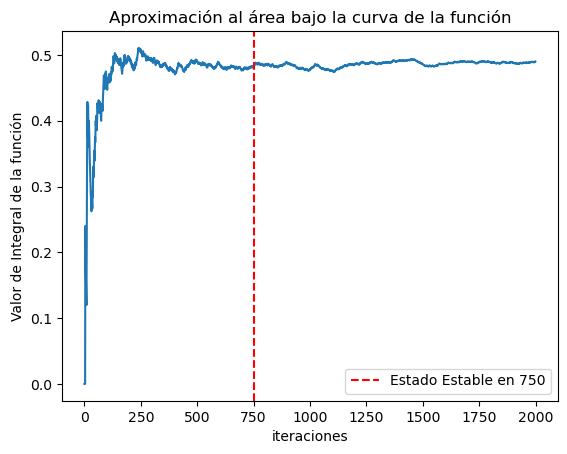

In [14]:
plt.plot(exp)  #Grafica la lista de aproximaciones de acuerdo a la cantidad de experiemntos realizada.
plt.xlabel('iteraciones')
plt.ylabel('Valor de Integral de la función')
plt.title('Aproximación al área bajo la curva de la función')
# Agrega una línea vertical en la iteración 750 que de manera visual es donde comienza el estado estable.
plt.axvline(x=750, color='red', linestyle='--', label='Estado Estable en 750')

plt.legend()  # Muestra la leyenda si es necesario
plt.show()

**PASO 8**. Replique el modelo.

In [15]:
def area(repeticiones): #Esta función hara la simulacion anterior muchas veces, es decir, hará "repeticiones" cantidad de veces
    Area = []
    for i in range(repeticiones):
        Area.append(experimentos(750)[-1]) #Calcula la media de 750 experiementos unas N (repeticiones) cantidad de veces.
    return Area #Nos regresa N (repeticiones) medias de 750 experiemntos cada una.

In [16]:
N=100
simulacion = area(N)

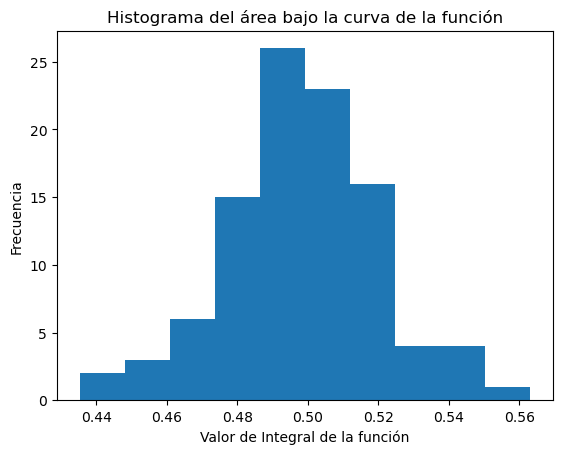

In [17]:
plt.hist(simulacion) #Grafica las frecuencias de la aproximación al valor del área bajo al curva de la función de las N simualciones con 750 experiementos cada una.
plt.xlabel('Valor de Integral de la función')
plt.ylabel('Frecuencia')
plt.title('Histograma del área bajo la curva de la función')
plt.show()

**PASO 9**. Calcule la media del área bajo la curva de la función y su desviación estándar.

In [18]:
media = np.mean(simulacion) #Calcula la media de esas N simulaciones
var = np.var(simulacion) #Calcula la varianza de esas N simulaciones
desv = np.std(simulacion) #Calcula la desvaicion de esas N simulaciones

**PASO 10**. Halle el intervalo de confianza del valor de la integral con un nivel de confianza del $95 \%$.
\begin{equation*}
\overline{x}- Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}} < \mu < \overline{x}+ Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}}
\end{equation*}

In [19]:
from scipy.stats import norm #Importamos la libreria para poder obtener el valor de Z.
alpha = 1 - 0.95 #Alpha es igual a 1 - la confianza del intervalo
z_alpha_2 = norm.ppf(1-alpha / 2) #Mandamos a pedir el valor de Z para \alpha/2, sabemos que si es el 95% de confienza, Z esta cercano al 1.96.
l_inferior = media - z_alpha_2 * (desv / math.sqrt(N)) #Sacamos limite inferior por la formula
l_superior = media + z_alpha_2 * (desv / math.sqrt(N)) #Sacamos limite superior por la formula
print("Entonces: ", l_inferior, "< \u03BC <", l_superior) #El intervalo en donde se encuentra el valor real a una confienza del 95%

Entonces:  0.493778696720752 < μ < 0.5022853032792481
